In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pathlib import Path
import os

C:\Users\u5801283\Documents\Honours\honours_final\honours\thesis\figs
[10, 15, 20, 50, 100]


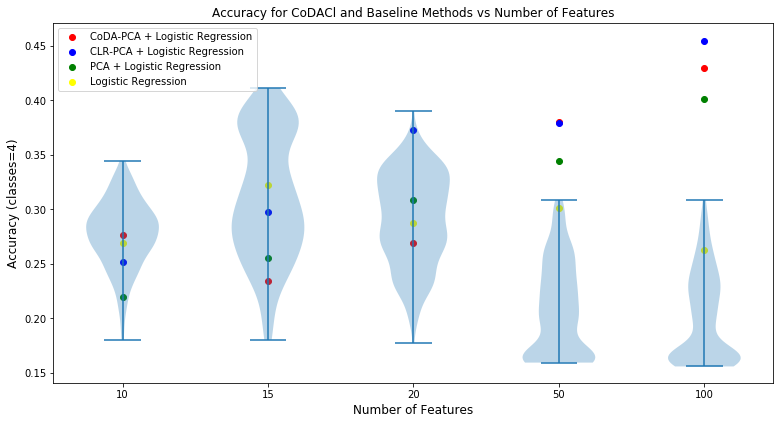

In [236]:
#find the path to store relative to current script
p = Path(os.getcwd()).parents[3]
PATH = os.path.join(os.path.join(p, "thesis"), "figs")
print (PATH)

df = pd.read_csv("class_test_2.csv")




#params from experiment:

nn_dims = [[10,5, [[7,],[7,]]], [15,5, [[10,],[10,]]], [20,5, [[15,],[15,]]],[20,10, [[15,],[15,]]], [50,10, [[30,],[30,]]],[50,5, [[20,],[20,]]], [100,20, [[40,],[40,]]], [100,10, [[20,],[20,]]]]
lr_vals = [1e-3, 1e-4]
lam_vals = [0,1e-12,1e-11,1e-10,1e-8,1e-5,1e-2,1]
epoch_vals = [100, 200, 300, 400, 500, 1000]



#returns the mean scores for each parameter value, given a dataframe and the parameters
def get_param_scores_new(param_label, param_vals, df):
    #initialise x,y arrays for plotting
    x = []
    y = []
    baselines = []
    param_vals = np.unique(param_vals)
    
    for i in range(0,len(param_vals)):
        sub_df = pd.DataFrame(df[[str(param_label)  + " " + str(param_vals[i]) + ',' in x for x in df['Parameters']]])
        total_score = []
#         coda_pca_score = []
#         clr_pca_score = []
#         pca_score = []
#         naive_score = []

        
        
        for vals in sub_df['CoDACl Scores']:
            total_score.append(np.mean([float(i) for i in vals.strip('[').replace(',', '').strip(']').split(" ")]))
        
        #find the baselines: these are deterministic so we just need to take the first one
        coda_pca_score = np.mean([float(i) for i in sub_df['CoDAPCA Scores'].iloc[0].strip('[').replace(',', '').strip(']').split(" ")])
        clr_pca_score = np.mean([float(i) for i in sub_df['CLRPCA Scores'].iloc[0].strip('[').replace(',', '').strip(']').split(" ")])
        pca_score = np.mean([float(i) for i in sub_df['PCA Scores'].iloc[0].strip('[').replace(',', '').strip(']').split(" ")])
        naive_score = np.mean([float(i) for i in sub_df['Naive Scores'].iloc[0].strip('[').replace(',', '').strip(']').split(" ")])
            
        baselines.append([coda_pca_score, clr_pca_score, pca_score, naive_score])
        
#         for vals in sub_df['CoDAPCA Scores']:
#             coda_pca_score.append(np.mean([float(i) for i in vals.strip('[').replace(',', '').strip(']').split(" ")]))
#         for vals in sub_df['CLRPCA Scores']:
#             clr_pca_score.append(np.mean([float(i) for i in vals.strip('[').replace(',', '').strip(']').split(" ")]))
#         for vals in sub_df['PCA Scores']:
#             pca_score.append(np.mean([float(i) for i in vals.strip('[').replace(',', '').strip(']').split(" ")]))
#         for vals in sub_df['Naive Scores']:
#             naive_score.append(np.mean([float(i) for i in vals.strip('[').replace(',', '').strip(']').split(" ")]))
            
            
        x.append(param_vals[i])
        y.append(total_score)
    return x,y, baselines




# x, y = get_param_scores('epochs', epoch_vals, df)


# plt.plot(x,y)

x, y, baselines = get_param_scores_new('num_features', np.array(nn_dims)[:,0], df)





# Create a figure instance
fig = plt.figure(figsize = (10, 5))
# Create an axes instance
ax = fig.add_axes([0,0,1,1])


ax.scatter(np.arange(1,len(x)+1), np.array(baselines)[:,0], color='red', label="CoDA-PCA + Logistic Regression")
ax.scatter([1,2,3,4,5], np.array(baselines)[:,1], color='blue', label="CLR-PCA + Logistic Regression")
ax.scatter([1,2,3,4,5], np.array(baselines)[:,2], color='green', label="PCA + Logistic Regression")
ax.scatter([1,2,3,4,5], np.array(baselines)[:,3], color='yellow',label="Logistic Regression")


# Create the boxplot
bp = ax.violinplot(y)

ax.set_title('Accuracy for CoDACl and Baseline Methods vs Number of Features', fontsize=12)

ax.set_xlabel('Number of Features',fontsize='large')
ax.set_ylabel('Accuracy (classes=4)',fontsize='large')
ax.set_xticks(np.arange(1, len(x) + 1))
ax.set_xticklabels(x)

plt.legend()
plt.plot()
plt.savefig(os.path.join(PATH, "test.svg"))
print(x)





In [215]:
np.arange(1,3)

array([1, 2])

In [108]:
print(np.array(nn_dims)[:,0])

[10 15 20 20 50 50 100 100]


C:\Users\u5801283\Documents\Honours\honours_final\honours


[]

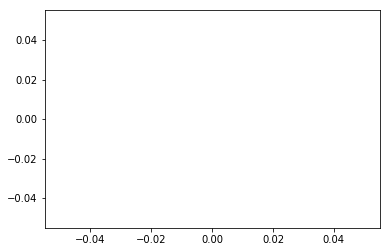